## In this notebook, we will compute the power spectrum of the curvature  perturbation $\mathcal{R}$ for canonical single field models: 

### $$ S = \int {\rm d}^4 x\, \bigg\{\frac{M_{\rm pl}^2}{2} R - \frac{1}{2}\partial_\mu \phi \partial^\mu \phi -V(\phi) \bigg\} $$

## where $R$ is the Riccia scalar, $\phi$ is the inflaton and $V(\phi)$ is its scalar potential. For this purpose, we can focus on the spatially flat gauge: 

### $$ \phi = \bar{\phi} + \delta \phi, \quad\quad \hat{g}_{ij} = a^2(t)\, \delta_{ij}  $$

## to describe the equations of motion of the Mukhanov-Sasaki (MS) variable $v = a \delta \phi$ in Fourier space as

### $$ v_k''(\tau) + \left(k^2 - \frac{z''}{z}\right)v_k(\tau) = 0,$$ 

## where 

### $$ \frac{z''}{z} = (aH)^2 \left[2 - \epsilon + \frac{3\eta}{2}+\frac{\eta^2}{4}-\frac{\epsilon\eta}{2}+ \frac{1}{2}\frac{{\rm d}\eta}{{\rm d}N}\right], \quad\quad {\rm d}N = H{\rm d}t. $$

## Deep inside the horizon $k \gg a H$,  mode functions of MS variable is subject to Bunch-Davies vacuum conditions:

### $$ v_k(\tau)\, \bigg|_{\rm in} = \frac{e^{-ik\tau}}{\sqrt{2k}}, \quad\quad\quad v_k'(\tau)\, \bigg|_{\rm in} = -ik v_k(\tau)\, \bigg|_{\rm in}.$$

## In terms of the MS variable, we can write the late time power spectrum of the curvature perturbation as 

### $$ \mathcal{R}_k = \frac{v_k}{z} \quad \rightarrow \quad \mathcal{P}_{\mathcal{R}} = \frac{k^3}{2\pi^2} \bigg|\frac{v_k}{z}\bigg|^2,$$

## where $z = a \sqrt{2\epsilon} M_{\rm pl}$. To determine the behavior of each $k$ mode we need to: 

## 1. Charecterize the background evolution in terms of 
### $$ \epsilon \equiv - \frac{{\rm d}\ln H}{{\rm d}N},\quad \eta \equiv \frac{{\rm d}\ln \epsilon}{{\rm d}N},\quad \frac{\dot{\eta}}{H}\equiv \frac{{\rm d}\eta}{{\rm d}N} $$
##  2. Given a particular background solution as described above, solve MS equation for many k modes by initializing them in the BD vacuum
***

In [3]:
############ The following syntax is required for inline plotting #######################

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

######### Importing Libraries and methods required ###########
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as Nint
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.optimize import brentq

## We parametrize the background using the effective parametrization described in arXiv:XXXX.XXXX. Relevant background and slow-roll parameters are defined below 

In [4]:
def eta(n): 
    e0 = 0.02; ni0= 0.0 ; no0=33.2; s0 = 1.; e1 = -6.3; ni1=33.2; no1=35.7; s1=0.5;
    e2 = 0.3; ni2 = 35.7; no2 = 55; s2 = 1.; ef=3; nif = 55; nof=65; sf=2;
    return (e0/2) * (np.tanh((n - ni0)/s0) - np.tanh((n - no0)/s0)) + (e1/2) * (np.tanh((n - ni1)/s1) - np.tanh((n - no1)/s1)) + (e2/2) * (np.tanh((n - ni2)/s2) - np.tanh((n - no2)/s2))+ (ef/2) * (np.tanh((n - nif)/sf) - np.tanh((n - nof)/sf))

def detadN(n):
    return 1.5 * (-0.5 * (1/np.cosh(0.5 * (-65. + n)))**2 + 0.5 * (1/np.cosh(0.5 *(-55. + n)))**2) + 0.15 * (- (1/np.cosh(-55. + n))**2 + (1/np.cosh(-35.7 + n))**2) - 6.30 * (- (1/np.cosh(2 * (-35.7 + n)))**2 + (1/np.cosh(2 * (-33.2 + n)))**2) + 0.01 * (- (1/np.cosh(-33.2 + n))**2 + (1/np.cosh(n))**2)

######## Defining \epsilon as the exponential of an integral over eta #######

efl = np.linspace(0, 60, 1000)  # Generate a list of e-folds by dividing the range [0,60] to 1000 pieces

epsilon=[]   # Generate an empty list an fill it iteratively by evaluating integral below
for i in efl:
    epsilon.append(np.exp(Nint.quad(lambda t: eta(t), 60, i)[0]))

eps = interp1d(efl,epsilon, kind='cubic', bounds_error=False) # Define the interpolation function using the list we just generated

############    End of defining \epsilon   ##########

# Defining Hubble rate in the same way (exponential of an integral over epsilon) 
# where we normalize it as Hubble = H_{end} H(n) 

Hubble = []
for i in efl:
    Hubble.append(np.exp(- Nint.quad(lambda t: eps(t), 60, i)[0]))

H = interp1d(efl,Hubble, kind='cubic', bounds_error=False)

In [1]:
############################## Plotting \epsilon and \eta (optional) #############################################

#zerosofeta = fsolve(eta,[32,36]) # find zeros of eta to plot vertical line indicating the beginning and end of 
                                 # non-attractor era

# plt.rcParams['text.usetex'] = True
# plt.tick_params(axis='both', direction="in", labelsize = 13, top= 'bool', right= 'bool')
# plt.tick_params(axis="both", which='minor', direction='in',top= 'bool', right= 'bool')

# plt.yscale('log')

# plt.xlabel(r'$ N $',fontsize=14)

# plt.xlim(0,60)
# plt.ylim(10**(-10),200)

# plt.axhline(1, color = 'black', linestyle = ':', lw = 0.4)

# plt.axvline(zerosofeta[0], color = 'gray', linestyle = ':', lw = 0.8)
# plt.axvline(zerosofeta[1], color = 'gray', linestyle = ':', lw = 0.8)
# plt.axvspan(zerosofeta[0],zerosofeta[1], alpha = 0.05, color = 'green')
# plt.axvspan(0,zerosofeta[0], alpha = 0.05, color = 'blue')
# plt.axvspan(zerosofeta[1],60, alpha = 0.05, color = 'blue')

# plt.text(15,15, r'$ \textrm{Phase I}$', color= 'black', fontsize = 14)
# plt.text(33.5,15, r'$ \textrm{II}$', color= 'black', fontsize = 14)
# plt.text(45,15, r'$ \textrm{Phase III}$', color= 'black', fontsize = 14)

# plt.plot(efl,eps(efl), color = 'orange', label = r'$\epsilon$')
# plt.plot(efl, abs(eta(efl)),color = 'r',label = r'$|\eta|$')

# plt.legend(loc = 'best', fontsize = 14, frameon = False)
# plt.savefig('cepseta.pdf', bbox_inches= 'tight', format= 'pdf', dpi=720)

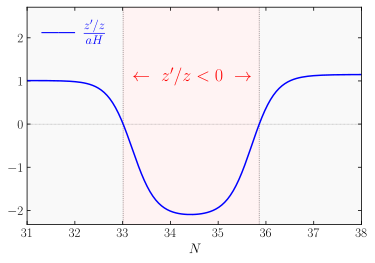

In [5]:
#################################### Plotting z'/z in units of aH ################################################
def zpoz(n):
    return 1 + 0.5 * eta(n)

zerosofzpoz = fsolve(zpoz,[32,36]) # find zeros of eta to plot vertical line indicating the beginning and end of 
                                 # non-attractor era

plt.rcParams['text.usetex'] = True
plt.tick_params(axis='both', direction="in", labelsize = 13, top= 'bool', right= 'bool')
plt.tick_params(axis="both", which='minor', direction='in',top= 'bool', right= 'bool')

plt.xlabel(r'$ N $',fontsize=14)

plt.xlim(31,38)

plt.axhline(0, color = 'black', linestyle = ':', lw = 0.3)
plt.text(31.3, 2, r'\raisebox{2pt}{---}\raisebox{2pt}{---}\,\,\,$\frac{z^{\prime}/z}{aH} $', color = 'blue', fontsize=18)
plt.text(33.2, 1, r'$\leftarrow\,\,  z^{\prime}/z < 0 \,\, \rightarrow$', color = 'red', fontsize=18)

plt.axvline(zerosofzpoz[0], color = 'gray', linestyle = ':', lw = 0.8)
plt.axvline(zerosofzpoz[1], color = 'gray', linestyle = ':', lw = 0.8)
plt.axvspan(zerosofzpoz[0],zerosofzpoz[1], alpha = 0.05, color = 'red')
plt.axvspan(0,zerosofzpoz[0], alpha = 0.05, color = 'gray')
plt.axvspan(zerosofzpoz[1],60, alpha = 0.05, color = 'gray')


plt.plot(efl,zpoz(efl), color = 'blue')

plt.savefig('czpoz.pdf', bbox_inches= 'tight', format= 'pdf', dpi=720)

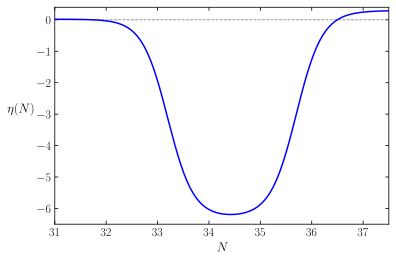

In [7]:
# Plotting eta 

plt.tick_params(axis='both', direction="in", labelsize = 12, top= 'bool', right= 'bool')

plt.axhline(0, color = 'gray', linestyle = '--', lw = 0.8)
plt.ylim(-6.5,0.4)
plt.xlim(31,37.5)
plt.xlabel(r'$ N $',fontsize=13)
plt.ylabel(r' $\eta(N)$ ', fontsize=13, rotation = 0,  labelpad = 15)
plt.plot(efl, eta(efl),'b')

In [8]:
########################### Plotting Hubble rate #################################################################

# plt.tick_params(axis='both', direction="in", labelsize = 12, top= 'bool', right= 'bool')

# plt.axhline(0, color = 'gray', linestyle = '--', lw = 0.8)
# plt.ylim(1,1.8)
# plt.xlim(0,61)
# plt.xlabel(r'$ N $',fontsize=13)
# plt.ylabel(r' $\frac{H(N)}{H_{\rm end}}$ ', fontsize=19, rotation = 0,  labelpad = 20)
# plt.plot(efl, H(efl),'k')

## Define a new variable through 
### $$v_k = \bar{v}_k \frac{e^{-ik\tau}}{\sqrt{2k}}$$
## EoM satisfied by MS variable is then given by
### $$\bar{v}_k''(N) + \left((1-\epsilon)-2i \frac{k}{aH}\right)\bar{v}_k'(N) - \frac{z''}{(aH)^2 z}\bar{v}_k(N) = 0$$
## using 
### $${\rm d N} = H {\rm d}t = (aH){\rm d}\tau$$. 
## In this parametrization, BD initial conditions can be translated into

### $$\bar{v}_k\, \big|_{\rm in} = 1 , \quad\quad \bar{v}_k'\, \big|_{\rm in} = 0$$

## and

### $$\frac{z''}{z} = (aH)^2 \left[2 - \epsilon + \frac{3\eta}{2}+\frac{\eta^2}{4}-\frac{\epsilon\eta}{2}+ \frac{1}{2}\frac{{\rm d}\eta}{{\rm d}N}\right]$$

## noting 

### $$a = a_{\rm end} e^{N-60}, \quad H = H_{\rm end} \exp\left[-{\int_{60}^N {\rm d}N\, \epsilon(N)}\right] $$


In [15]:
# We are going to solve MS for many different k values, so first we generate an array of wave-numbers defined
# with respect to k_{end} = a_{end} H_{end} namely the mode that exit the horizon right at the end of inflation
# i.e we parametrize the mode evolution in terms of fixed k/k_{end}. 

k_ini = 9.29188 * 10**(-25); #Chosen on purpose to this value to make the resulting pheno interesting at LISA scales
k_fin = 4 * 10**(-7); # Note again these numbers indicate the ratio k/k_{end}


# Generate an empty list and fill it to produce a grid of k values to be used later, 
# Grid can be made more finely coarsed playing with numbers below (i.e 201, 200)

kk=[]   

for i in np.arange(1,201):
    kk.append(k_ini*(k_fin/k_ini)**((i-1)/(200-1)))
    
print(len(kk),kk[199])  # Note that kk has 200 elements labelled as 0,.....,199 

200 4e-07


## Finding the horizon crossing time through:
### $$k^2 = \frac{z''}{2z}\bigg|_{N_{\rm hc}}$$
## and initialize the modes at 
### $$ N_{\rm in} = N_{\rm hc} - 4$$

In [20]:
########################## First define z''/z ###############################################

def zppoz(n): 
    return ((np.exp(n-60)*H(n))**2)*(2 - eps(n)+ 1.5*eta(n) + 0.25*eta(n)**2 - 0.5* eps(n)*eta(n)+0.5*detadN(n))

###################### Solve for e-fold number of horizon crossing for each k defined above ######################

n_hc = []

for item in kk:
    n_hc.append(brentq(lambda n: item - abs(zppoz(n)/2)**(0.5),4,50))
    

#### to initilize all k modes, we choose to start the evaluation 4-folds before the horizon crossing
#### to ensure that all the modes we evaluate are deep inside the horizon initially

n_in = [x - 4 for x in n_hc]

## Solving MS as defined above for the largest scale we consider for the purpose of normalizing the power spectrum

In [21]:
########################## Define the system of equations satisfied by v_k(N), v_k'(N) #######################

def eomv(t,v,k):
    
    vc = v[0]
    vcp = v[1]
    
    vdot = [[],[]]
    
    vdot[0] = vcp
    vdot[1] = - (((1 - eps(t)) - (0 + 2.j) * k/(np.exp(t-60) * H(t)))* vcp) + (2 - eps(t) + 1.5 * eta(t) + 0.25 * eta(t)**2 - 0.5 * eps(t) * eta(t) + 0.5 * detadN(t)) * vc
    return vdot

vin = [1. + 0.j, 0 + 0.j] # Initial conditions to be passed to the diff eq. solver odeint 

# solving only for the initial k, i.e kk[0]

sol = solve_ivp(lambda t,v: eomv(t,v,kk[0]),(n_in[0],60), vin, method = 'DOP853', max_step = 0.1) # DOP853 method could be also used with max_step=0.1

In [26]:
# Generate an interpolation function of the solution for \bar{v}_k

vcs_sq = abs(sol.y[0])**2
n_s = sol.t

sol_vcs_sq = interp1d(n_s, vcs_sq) # Define the interpolation function using the list we just generated

## Now, we use the solution obtained above to enforce the normalization of the power spectrum at the pivot scale k_cmb which we assign as kk[0]: 

### $$\mathcal{P}_{\mathcal{R}}(N_{\rm end} , k_{\rm cmb}) = \frac{H_{\rm end}^2}{8\pi^2 \epsilon(N_{\rm end})M_{\rm pl}^2}\left(\frac{k_{\rm cmb}}{k_{\rm end}}\right)^2 \,\, \bigg| \bar{v}_{k_{\rm cmb}}(N_{\rm end}) \bigg|^2 = 2.1 \times 10^{-9}$$ 

## In this way we obtain a numerical value for:

### $$\frac{H_{\rm end}}{M_{\rm pl}}$$

## by utilizing the brentq function below:

In [29]:
Hend = brentq(lambda x: (x/(8 * (np.pi**2) * eps(60))**(0.5))* (kk[0]) * (sol_vcs_sq(60))**0.5 - (2.1*10**(-9))**(0.5),-1,1)
print(Hend)

1.5074339011267313e-05


In [15]:
# Now we are ready to solve MS for all k values to obtain the power spectrum as a function of scales
# We solve for all k and write the result in txt file with two coloumns: k/k_{end} vs Power spectrum

for i in range(0,200):
    
    solf = solve_ivp(lambda t,v: eomv(t,v,kk[i]),(nin[i],60), vin, method = 'DOP853', max_step = 0.1)
     
    vc_sq = abs(solf.y[0])**2 # is a list/array for all n values between [nin[i],60] 
    
    psc = (Hend**2/(8*np.pi**2*eps(60))) * (kk[i]**2) * (vc_sq[len(vc_sq)-1]) # the last value in the list 
                                                                              # is len(vc_sq)-1
    
    pscfile = open('sfcan_powerspec.txt','a')
    pscfile.write(str(kk[i]) + ',' + ' ' + str(psc) + '\n')
    pscfile.close()

In [31]:
# Finding The scale that exits the horizon at the beginning of non-attractor era (for plotting purposes)

nb_na = zerosofzpoz[0]

kb_na =(0.5 * abs(zppoz(nb_na)))**(0.5)

# The scale that exits the horizon at the end of non-attractor era using \eta \sim 0.3

def efunc(n):
    return eta(n) - 0.295

ne_na = fsolve(efunc,[39,41])[0]
ke_na =(0.5 * abs(zppoz(ne_na)))**(0.5)



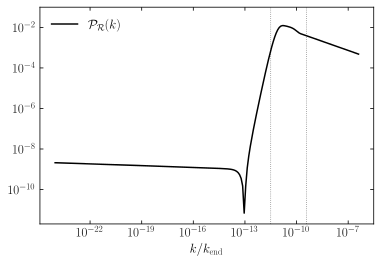

In [36]:
############ First plot the "raw" data generated: this will provide the power spectrum vs k/k_{end} ##############

fig = plt.figure()

powadata = np.loadtxt('sfcan_powerspec.txt', delimiter= ',')
kokend = powadata[:, 0] # k/k_{end} values
psR = powadata[:, 1]

#Prediction from the analytic formulas develop via gradient expansion formalism
#powaandata = np.loadtxt('psvan.txt')
#kokendan = powaandata[:,0]
#psRan = powaandata[:,1]

plt.rcParams['text.usetex'] = True

plt.tick_params(axis='both', direction="in", labelsize = 13, top= 'bool', right= 'bool')
plt.tick_params(axis="both", which='minor', direction='in',top= 'bool', right= 'bool')

plt.xscale('log')
plt.yscale('log')

plt.ylim(2 * 10**(-12), 10**(-1))

plt.xlabel(r'$ k/k_{\rm end}$',fontsize=13)

plt.axvline(kb_na, color = 'gray', linestyle = ':', lw = 0.8)
plt.axvline(ke_na, color = 'gray', linestyle = ':', lw = 0.8)


plt.plot(kokend, psR,'k', label = r' $\mathcal{P}_{\mathcal{R}}(k)$ ')
#plt.scatter(kokendan,psRan, marker = 'o', alpha = 0.4, color = 'blue', s = 15, label = r' $\mathcal{P}_{\mathcal{R}}(k)$ via eq. (C.10) ')
plt.legend(loc = 'best', fontsize = 13, frameon = False)

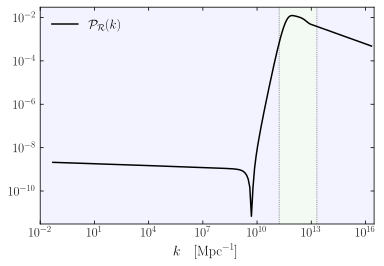

In [38]:
####################### Convert our normalization to actual k space in Mpc^{-1} ##################################

kcmb = 0.05 # in inverse Mpc
kend = kcmb/kokend[0]

klistMpc = [kend * x for x in kokend]

#klistanMpc = [kend * x for x in kokendan]

######################################### And plot again #########################################################

plt.rcParams['text.usetex'] = True

plt.tick_params(axis='both', direction="in", labelsize = 13, top= 'bool', right= 'bool')
plt.tick_params(axis="both", which='minor', direction='in',top= 'bool', right= 'bool')

plt.xscale('log')
plt.yscale('log')

plt.xlim(0.01, 3 * 10**16)
plt.ylim(3*10**(-12), 3 * 10**(-2))

plt.xlabel(r'$ k \quad [{\rm Mpc}^{-1}]$',fontsize=14)

plt.axvline(kend * kb_na, color = 'gray', linestyle = ':', lw = 0.8)
plt.axvline(kend * ke_na, color = 'gray', linestyle = ':', lw = 0.8)

plt.axvspan(0.01,kend * kb_na, alpha = 0.05, color = 'blue')
plt.axvspan(kend * kb_na,kend * ke_na, alpha = 0.05, color = 'green')
plt.axvspan(kend * ke_na, 10**17, alpha = 0.05, color = 'blue')


plt.plot(klistMpc, psR,'k', label = r' $\mathcal{P}_{\mathcal{R}}(k)$ ')
#plt.scatter(klistanMpc,psRan, marker = 'o', alpha = 0.7, color = 'blue', s = 15, label = r' $\mathcal{P}_{\mathcal{R}}(k)$ \textrm{via eq. (C.10)} ')

plt.legend(loc = 'best', fontsize = 13, frameon = False)

#plt.savefig('psc1.pdf', bbox_inches= 'tight', format= 'pdf', dpi=720)

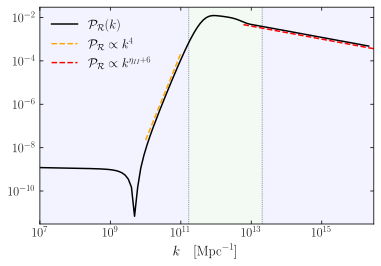

In [40]:
################### Zoomed in plot to the rise and fall of the spectrum around its peak ##########################

plt.rcParams['text.usetex'] = True

plt.tick_params(axis='both', direction="in", labelsize = 13, top= 'bool', right= 'bool')
plt.tick_params(axis="both", which='minor', direction='in',top= 'bool', right= 'bool')

plt.xscale('log')
plt.yscale('log')

plt.xlim(10**7, 3 * 10**16)
plt.ylim(3*10**(-12), 3 * 10**(-2))

plt.xlabel(r'$ k \quad [{\rm Mpc}^{-1}]$',fontsize=14)

plt.axvline(kend * kb_na, color = 'gray', linestyle = ':', lw = 0.8)
plt.axvline(kend * ke_na, color = 'gray', linestyle = ':', lw = 0.8)

plt.axvspan(0.01,kend * kb_na, alpha = 0.05, color = 'blue')
plt.axvspan(kend * kb_na,kend * ke_na, alpha = 0.05, color = 'green')
plt.axvspan(kend * ke_na, 10**17, alpha = 0.05, color = 'blue')


plt.plot(klistMpc, psR,'k', label = r' $\mathcal{P}_{\mathcal{R}}(k)$ ')


x1 = np.linspace(10**10, 10**11, 100) #generate some values of k values to plot reference lines
x2 = np.linspace(6*10**12, 10**18, 100) # with the aim of determining the slope of the Power spectrum 

plt.plot(x1, 7*10**(-48.5)*(x1**4), color = 'orange', linestyle = '--', label = r'$\mathcal{P}_{\mathcal{R}}\propto k^4$')
plt.plot(x2, 32*(x2**(-0.3)), color = 'r', linestyle = '--', label = r'$\mathcal{P}_{\mathcal{R}}\propto k^{\eta_{II} + 6}$')

plt.legend(loc = 'best', fontsize = 13, frameon = False)
#plt.savefig('psc2.pdf', bbox_inches= 'tight', format= 'pdf', dpi=720)